<a href="https://colab.research.google.com/github/surajitsaikia27/AutoEncoder_MNIST_Fashion/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow

In [0]:
import keras

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
x = np.random.rand(100,24)

In [0]:
y = pd.DataFrame(x)

In [0]:
import matplotlib.pyplot as plt

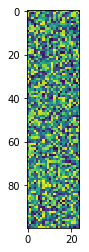

In [23]:
plt.imshow(y)

In [0]:
from keras.layers import Dense, Dropout, Input, Conv2D, Flatten, BatchNormalization, Reshape
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [0]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [0]:
 x_train = (x_train.astype(np.float32) - 127.5)/127.5

In [27]:
x_train.shape

(60000, 28, 28)

In [0]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)


In [29]:
def create_generator():
    generator=Sequential()
    generator.add(Conv2D(56, (3,3), strides =(3,3), padding ='same', input_shape = [28,28,1]))
    #generator.add(Dense(units=256,input_dim=100))
    generator.add(BatchNormalization())
    generator.add(LeakyReLU(0.2))
    generator.add(Flatten())
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    #generator.add(Reshape((28,28)))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 10, 10, 56)        560       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 56)        224       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 10, 10, 56)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2867712   
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
__________

In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    #noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    noise= np.random.normal(0,1, [batch_size, 28,28,1])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(-1,28,28)
   
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

In [32]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    #discriminator.add(Conv2D(64, (3,3), strides =(1,1), padding ='same', input_shape = [28,28,1]))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    #discriminator.add(Flatten())
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()



W0817 14:09:46.610980 139814762686336 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
__________

In [33]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    img_shape=(28, 28, 1)
    gan_input = Input(img_shape)
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return gan
gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               4197408   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 5,657,633
Trainable params: 4,197,296
Non-trainable params: 1,460,337
_________________________________________________________________


In [34]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    #x_train = x_train.reshape(60000, 784)
    
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train.shape

In [0]:
x = x_train.reshape(-1,784)

In [0]:
x.shape

In [0]:
generator= create_generator()
discriminator= create_discriminator()
gan = create_gan(discriminator, generator)

In [0]:
batch_count = x_train.shape[0] / 128

In [0]:
batch_size = 128
for e in range(1,800 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 28,28,1])
            #noise = np.random.rand(100,28,28)
            #noise = noise.reshape(100,28,28)
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            #generated_images = generated_images.reshape(-1,28,28,1)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            image_batch = image_batch.reshape(-1,784)
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            #noise= np.random.normal(0,1, [batch_size, 100])
            noise= np.random.normal(0,1, [batch_size, 28,28,1])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
           
            gan.train_on_batch(noise, y_gen)
            
       
           
plot_generated_images(e, generator)

  3%|▎         | 4/128 [00:00<00:04, 30.92it/s]

Epoch 1


  3%|▎         | 4/128 [00:00<00:03, 34.11it/s]

Epoch 2


  3%|▎         | 4/128 [00:00<00:03, 35.46it/s]

Epoch 3


  3%|▎         | 4/128 [00:00<00:03, 34.90it/s]

Epoch 4


  3%|▎         | 4/128 [00:00<00:03, 34.89it/s]

Epoch 5


  3%|▎         | 4/128 [00:00<00:03, 34.70it/s]

Epoch 6


  3%|▎         | 4/128 [00:00<00:03, 35.06it/s]

Epoch 7


  3%|▎         | 4/128 [00:00<00:03, 34.89it/s]

Epoch 8


  3%|▎         | 4/128 [00:00<00:03, 34.71it/s]

Epoch 9


  3%|▎         | 4/128 [00:00<00:03, 34.65it/s]

Epoch 10


  3%|▎         | 4/128 [00:00<00:03, 33.82it/s]

Epoch 11


  3%|▎         | 4/128 [00:00<00:03, 35.00it/s]

Epoch 12


  3%|▎         | 4/128 [00:00<00:03, 34.78it/s]

Epoch 13


  3%|▎         | 4/128 [00:00<00:03, 35.34it/s]

Epoch 14


  3%|▎         | 4/128 [00:00<00:03, 32.90it/s]

Epoch 15


  3%|▎         | 4/128 [00:00<00:03, 34.54it/s]

Epoch 16


  3%|▎         | 4/128 [00:00<00:03, 33.78it/s]

Epoch 17


  3%|▎         | 4/128 [00:00<00:03, 32.64it/s]

Epoch 18


  3%|▎         | 4/128 [00:00<00:03, 34.43it/s]

Epoch 19


  3%|▎         | 4/128 [00:00<00:03, 36.12it/s]

Epoch 20


  3%|▎         | 4/128 [00:00<00:03, 32.37it/s]

Epoch 21


  3%|▎         | 4/128 [00:00<00:03, 36.06it/s]

Epoch 22


  3%|▎         | 4/128 [00:00<00:03, 34.51it/s]

Epoch 23


  3%|▎         | 4/128 [00:00<00:03, 35.22it/s]

Epoch 24


  3%|▎         | 4/128 [00:00<00:03, 34.94it/s]

Epoch 25


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 26


  3%|▎         | 4/128 [00:00<00:03, 35.63it/s]

Epoch 27


  3%|▎         | 4/128 [00:00<00:03, 34.03it/s]

Epoch 28


  3%|▎         | 4/128 [00:00<00:03, 35.72it/s]

Epoch 29


  3%|▎         | 4/128 [00:00<00:03, 35.30it/s]

Epoch 30


  3%|▎         | 4/128 [00:00<00:03, 35.98it/s]

Epoch 31


  3%|▎         | 4/128 [00:00<00:03, 34.36it/s]

Epoch 32


  3%|▎         | 4/128 [00:00<00:03, 35.17it/s]

Epoch 33


  3%|▎         | 4/128 [00:00<00:03, 36.05it/s]

Epoch 34


  3%|▎         | 4/128 [00:00<00:03, 33.07it/s]

Epoch 35


  3%|▎         | 4/128 [00:00<00:03, 35.97it/s]

Epoch 36


  3%|▎         | 4/128 [00:00<00:03, 35.68it/s]

Epoch 37


  3%|▎         | 4/128 [00:00<00:03, 36.09it/s]

Epoch 38


  3%|▎         | 4/128 [00:00<00:03, 35.59it/s]

Epoch 39


  3%|▎         | 4/128 [00:00<00:03, 34.50it/s]

Epoch 40


  3%|▎         | 4/128 [00:00<00:03, 34.36it/s]

Epoch 41


  3%|▎         | 4/128 [00:00<00:03, 33.29it/s]

Epoch 42


  3%|▎         | 4/128 [00:00<00:03, 35.07it/s]

Epoch 43


  3%|▎         | 4/128 [00:00<00:03, 34.54it/s]

Epoch 44


  3%|▎         | 4/128 [00:00<00:03, 35.22it/s]

Epoch 45


  3%|▎         | 4/128 [00:00<00:03, 35.72it/s]

Epoch 46


  3%|▎         | 4/128 [00:00<00:03, 35.25it/s]

Epoch 47


  3%|▎         | 4/128 [00:00<00:03, 36.08it/s]

Epoch 48


  3%|▎         | 4/128 [00:00<00:03, 36.20it/s]

Epoch 49


  3%|▎         | 4/128 [00:00<00:03, 35.45it/s]

Epoch 50


  3%|▎         | 4/128 [00:00<00:03, 35.31it/s]

Epoch 51


  3%|▎         | 4/128 [00:00<00:03, 35.44it/s]

Epoch 52


  3%|▎         | 4/128 [00:00<00:03, 35.69it/s]

Epoch 53


  3%|▎         | 4/128 [00:00<00:03, 35.85it/s]

Epoch 54


  3%|▎         | 4/128 [00:00<00:03, 35.40it/s]

Epoch 55


  3%|▎         | 4/128 [00:00<00:03, 36.55it/s]

Epoch 56


  3%|▎         | 4/128 [00:00<00:03, 33.68it/s]

Epoch 57


  3%|▎         | 4/128 [00:00<00:03, 34.11it/s]

Epoch 58


  3%|▎         | 4/128 [00:00<00:03, 32.76it/s]

Epoch 59


  3%|▎         | 4/128 [00:00<00:03, 35.66it/s]

Epoch 60


  3%|▎         | 4/128 [00:00<00:03, 35.48it/s]

Epoch 61


  3%|▎         | 4/128 [00:00<00:03, 35.31it/s]

Epoch 62


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 63


  3%|▎         | 4/128 [00:00<00:03, 35.13it/s]

Epoch 64


  3%|▎         | 4/128 [00:00<00:03, 36.48it/s]

Epoch 65


  3%|▎         | 4/128 [00:00<00:03, 33.71it/s]

Epoch 66


  3%|▎         | 4/128 [00:00<00:03, 35.34it/s]

Epoch 67


  3%|▎         | 4/128 [00:00<00:03, 34.86it/s]

Epoch 68


  3%|▎         | 4/128 [00:00<00:03, 34.45it/s]

Epoch 69


  3%|▎         | 4/128 [00:00<00:03, 34.36it/s]

Epoch 70


  3%|▎         | 4/128 [00:00<00:03, 32.81it/s]

Epoch 71


  3%|▎         | 4/128 [00:00<00:03, 35.81it/s]

Epoch 72


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 73


  3%|▎         | 4/128 [00:00<00:03, 35.57it/s]

Epoch 74


  3%|▎         | 4/128 [00:00<00:03, 36.11it/s]

Epoch 75


  3%|▎         | 4/128 [00:00<00:03, 35.52it/s]

Epoch 76


  3%|▎         | 4/128 [00:00<00:03, 34.99it/s]

Epoch 77


  3%|▎         | 4/128 [00:00<00:03, 36.23it/s]

Epoch 78


  3%|▎         | 4/128 [00:00<00:03, 36.34it/s]

Epoch 79


  3%|▎         | 4/128 [00:00<00:03, 35.47it/s]

Epoch 80


  3%|▎         | 4/128 [00:00<00:03, 34.99it/s]

Epoch 81


  3%|▎         | 4/128 [00:00<00:03, 36.23it/s]

Epoch 82


  3%|▎         | 4/128 [00:00<00:03, 35.67it/s]

Epoch 83


  3%|▎         | 4/128 [00:00<00:03, 33.25it/s]

Epoch 84


  3%|▎         | 4/128 [00:00<00:03, 35.53it/s]

Epoch 85


  3%|▎         | 4/128 [00:00<00:03, 34.67it/s]

Epoch 86


  3%|▎         | 4/128 [00:00<00:03, 36.09it/s]

Epoch 87


  3%|▎         | 4/128 [00:00<00:03, 36.40it/s]

Epoch 88


  3%|▎         | 4/128 [00:00<00:03, 35.43it/s]

Epoch 89


  3%|▎         | 4/128 [00:00<00:03, 36.19it/s]

Epoch 90


  3%|▎         | 4/128 [00:00<00:03, 35.46it/s]

Epoch 91


  3%|▎         | 4/128 [00:00<00:03, 35.47it/s]

Epoch 92


  3%|▎         | 4/128 [00:00<00:03, 36.23it/s]

Epoch 93


  3%|▎         | 4/128 [00:00<00:03, 35.27it/s]

Epoch 94


  3%|▎         | 4/128 [00:00<00:03, 35.84it/s]

Epoch 95


  3%|▎         | 4/128 [00:00<00:03, 36.47it/s]

Epoch 96


  3%|▎         | 4/128 [00:00<00:03, 36.33it/s]

Epoch 97


  3%|▎         | 4/128 [00:00<00:03, 35.08it/s]

Epoch 98


  3%|▎         | 4/128 [00:00<00:03, 32.71it/s]

Epoch 99


  3%|▎         | 4/128 [00:00<00:03, 36.16it/s]

Epoch 100


  3%|▎         | 4/128 [00:00<00:03, 35.98it/s]

Epoch 101


  3%|▎         | 4/128 [00:00<00:03, 35.95it/s]

Epoch 102


  3%|▎         | 4/128 [00:00<00:03, 35.92it/s]

Epoch 103


  3%|▎         | 4/128 [00:00<00:03, 35.67it/s]

Epoch 104


  3%|▎         | 4/128 [00:00<00:03, 34.78it/s]

Epoch 105


  3%|▎         | 4/128 [00:00<00:03, 35.54it/s]

Epoch 106


  3%|▎         | 4/128 [00:00<00:03, 35.37it/s]

Epoch 107


  3%|▎         | 4/128 [00:00<00:03, 35.12it/s]

Epoch 108


  3%|▎         | 4/128 [00:00<00:03, 35.69it/s]

Epoch 109


  3%|▎         | 4/128 [00:00<00:03, 33.76it/s]

Epoch 110


  3%|▎         | 4/128 [00:00<00:03, 35.32it/s]

Epoch 111


  3%|▎         | 4/128 [00:00<00:03, 33.20it/s]

Epoch 112


  3%|▎         | 4/128 [00:00<00:03, 35.79it/s]

Epoch 113


  3%|▎         | 4/128 [00:00<00:03, 33.83it/s]

Epoch 114


  3%|▎         | 4/128 [00:00<00:03, 36.22it/s]

Epoch 115


  3%|▎         | 4/128 [00:00<00:03, 35.66it/s]

Epoch 116


  3%|▎         | 4/128 [00:00<00:03, 35.95it/s]

Epoch 117


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 118


  3%|▎         | 4/128 [00:00<00:03, 36.38it/s]

Epoch 119


  3%|▎         | 4/128 [00:00<00:03, 36.17it/s]

Epoch 120


  3%|▎         | 4/128 [00:00<00:03, 35.68it/s]

Epoch 121


  3%|▎         | 4/128 [00:00<00:03, 35.98it/s]

Epoch 122


  3%|▎         | 4/128 [00:00<00:03, 33.82it/s]

Epoch 123


  3%|▎         | 4/128 [00:00<00:03, 35.89it/s]

Epoch 124


  3%|▎         | 4/128 [00:00<00:03, 33.27it/s]

Epoch 125


  3%|▎         | 4/128 [00:00<00:03, 36.24it/s]

Epoch 126


  3%|▎         | 4/128 [00:00<00:03, 32.65it/s]

Epoch 127


  3%|▎         | 4/128 [00:00<00:03, 35.28it/s]

Epoch 128


  3%|▎         | 4/128 [00:00<00:03, 34.90it/s]

Epoch 129


  3%|▎         | 4/128 [00:00<00:03, 35.80it/s]

Epoch 130


  3%|▎         | 4/128 [00:00<00:03, 35.07it/s]

Epoch 131


  3%|▎         | 4/128 [00:00<00:03, 35.42it/s]

Epoch 132


  3%|▎         | 4/128 [00:00<00:03, 35.85it/s]

Epoch 133


  3%|▎         | 4/128 [00:00<00:03, 35.75it/s]

Epoch 134


  3%|▎         | 4/128 [00:00<00:03, 35.58it/s]

Epoch 135


  3%|▎         | 4/128 [00:00<00:03, 35.28it/s]

Epoch 136


  3%|▎         | 4/128 [00:00<00:03, 35.88it/s]

Epoch 137


  3%|▎         | 4/128 [00:00<00:03, 35.95it/s]

Epoch 138


  3%|▎         | 4/128 [00:00<00:03, 36.13it/s]

Epoch 139


  3%|▎         | 4/128 [00:00<00:03, 33.88it/s]

Epoch 140


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 141


  3%|▎         | 4/128 [00:00<00:03, 33.16it/s]

Epoch 142


  3%|▎         | 4/128 [00:00<00:03, 36.00it/s]

Epoch 143


  3%|▎         | 4/128 [00:00<00:03, 35.64it/s]

Epoch 144


  3%|▎         | 4/128 [00:00<00:03, 35.92it/s]

Epoch 145


  3%|▎         | 4/128 [00:00<00:03, 35.35it/s]

Epoch 146


  3%|▎         | 4/128 [00:00<00:03, 35.95it/s]

Epoch 147


  3%|▎         | 4/128 [00:00<00:03, 35.31it/s]

Epoch 148


  3%|▎         | 4/128 [00:00<00:03, 35.78it/s]

Epoch 149


  3%|▎         | 4/128 [00:00<00:03, 35.64it/s]

Epoch 150


  3%|▎         | 4/128 [00:00<00:03, 35.91it/s]

Epoch 151


  3%|▎         | 4/128 [00:00<00:03, 35.24it/s]

Epoch 152


  3%|▎         | 4/128 [00:00<00:03, 35.34it/s]

Epoch 153


  3%|▎         | 4/128 [00:00<00:03, 35.55it/s]

Epoch 154


  3%|▎         | 4/128 [00:00<00:03, 34.80it/s]

Epoch 155


  3%|▎         | 4/128 [00:00<00:03, 34.59it/s]

Epoch 156


  3%|▎         | 4/128 [00:00<00:03, 36.23it/s]

Epoch 157


  3%|▎         | 4/128 [00:00<00:03, 35.98it/s]

Epoch 158


  3%|▎         | 4/128 [00:00<00:03, 36.31it/s]

Epoch 159


  3%|▎         | 4/128 [00:00<00:03, 34.23it/s]

Epoch 160


  3%|▎         | 4/128 [00:00<00:03, 34.29it/s]

Epoch 161


  3%|▎         | 4/128 [00:00<00:03, 33.87it/s]

Epoch 162


  3%|▎         | 4/128 [00:00<00:03, 35.74it/s]

Epoch 163


  3%|▎         | 4/128 [00:00<00:03, 33.92it/s]

Epoch 164


  3%|▎         | 4/128 [00:00<00:03, 35.18it/s]

Epoch 165


  3%|▎         | 4/128 [00:00<00:03, 35.71it/s]

Epoch 166


  3%|▎         | 4/128 [00:00<00:03, 35.40it/s]

Epoch 167


  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 168


  3%|▎         | 4/128 [00:00<00:03, 36.24it/s]

Epoch 169


  3%|▎         | 4/128 [00:00<00:03, 35.36it/s]

Epoch 170


  3%|▎         | 4/128 [00:00<00:03, 36.31it/s]

Epoch 171


  3%|▎         | 4/128 [00:00<00:03, 34.57it/s]

Epoch 172


  3%|▎         | 4/128 [00:00<00:03, 35.45it/s]

Epoch 173


  3%|▎         | 4/128 [00:00<00:03, 35.27it/s]

Epoch 174


  3%|▎         | 4/128 [00:00<00:03, 35.92it/s]

Epoch 175


  3%|▎         | 4/128 [00:00<00:03, 35.89it/s]

Epoch 176


  3%|▎         | 4/128 [00:00<00:03, 33.42it/s]

Epoch 177


  3%|▎         | 4/128 [00:00<00:03, 36.17it/s]

Epoch 178


  3%|▎         | 4/128 [00:00<00:03, 33.87it/s]

Epoch 179


  3%|▎         | 4/128 [00:00<00:03, 35.33it/s]

Epoch 180


  3%|▎         | 4/128 [00:00<00:03, 36.59it/s]

Epoch 181


  3%|▎         | 4/128 [00:00<00:03, 33.54it/s]

Epoch 182


  3%|▎         | 4/128 [00:00<00:03, 34.95it/s]

Epoch 183


  3%|▎         | 4/128 [00:00<00:03, 35.91it/s]

Epoch 184


  3%|▎         | 4/128 [00:00<00:03, 35.42it/s]

Epoch 185


  3%|▎         | 4/128 [00:00<00:03, 35.63it/s]

Epoch 186


  3%|▎         | 4/128 [00:00<00:03, 36.12it/s]

Epoch 187


  3%|▎         | 4/128 [00:00<00:03, 36.25it/s]

Epoch 188


  3%|▎         | 4/128 [00:00<00:03, 35.83it/s]

Epoch 189


  3%|▎         | 4/128 [00:00<00:03, 33.43it/s]

Epoch 190


  3%|▎         | 4/128 [00:00<00:03, 36.23it/s]

Epoch 191


  3%|▎         | 4/128 [00:00<00:03, 32.10it/s]

Epoch 192


  3%|▎         | 4/128 [00:00<00:03, 35.86it/s]

Epoch 193


  3%|▎         | 4/128 [00:00<00:03, 33.64it/s]

Epoch 194


  3%|▎         | 4/128 [00:00<00:03, 34.67it/s]

Epoch 195


  3%|▎         | 4/128 [00:00<00:03, 34.80it/s]

Epoch 196


  3%|▎         | 4/128 [00:00<00:03, 35.70it/s]

Epoch 197


  3%|▎         | 4/128 [00:00<00:03, 35.94it/s]

Epoch 198


  3%|▎         | 4/128 [00:00<00:03, 35.86it/s]

Epoch 199


  3%|▎         | 4/128 [00:00<00:03, 36.17it/s]

Epoch 200


 31%|███▏      | 40/128 [00:01<00:02, 35.68it/s]

In [0]:
plot_generated_images(200, generator)

In [0]:
generated_images = generator.predict(noise)

In [0]:
x = generated_images.reshape(-1,28,28)

In [0]:
x.shape

In [0]:
plt.imshow(x[18])

In [0]:
image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]

In [0]:
image_batch.shape

In [0]:
image_batch.shape

In [0]:
image_batch =x[np.random.randint(low=0,high=x.shape[0],size=batch_size)]

In [0]:
x=generated_images.reshape(-1,28,28,1)

In [0]:
x.shape

In [0]:
image_batch =x[np.random.randint(low=0,high=x.shape[0],size=batch_size)]

In [0]:
image_batch.shape

In [0]:
x_train.shape

In [0]:
noise= np.random.normal(0,1, [batch_size, 28,28,1])

In [0]:
noise.shape

In [0]:
generated_images = generator.predict(noise)

In [0]:
x = generated_images.reshape(-1,28,28)

In [0]:
x.shape

In [0]:
x_train.shape

In [0]:
gan.predict(noise[7])

In [0]:
 noise= np.random.normal(0,1, [batch_size, 100])

In [0]:
generated_images = generator.predict(noise)

In [0]:
x = generated_images.reshape(-1, 28,28)

In [0]:
plt.imshow(x[1])

In [0]:

x = pd.DataFrame(np.random.randint(100,size =(28,28)))

In [0]:
noise= np.random.normal(0,1, [batch_size, 28,28])


In [0]:
noise

In [0]:
noise
